In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

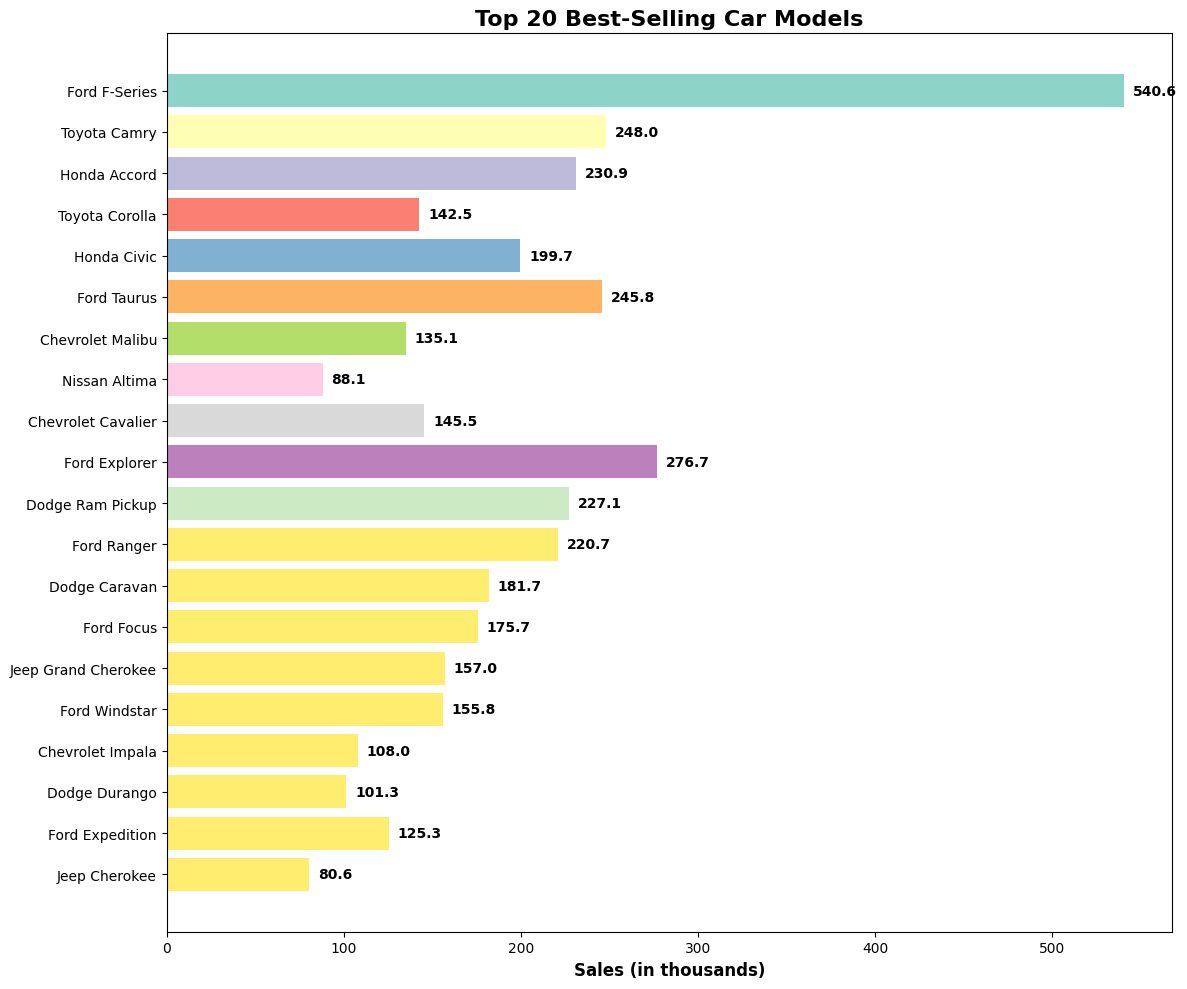

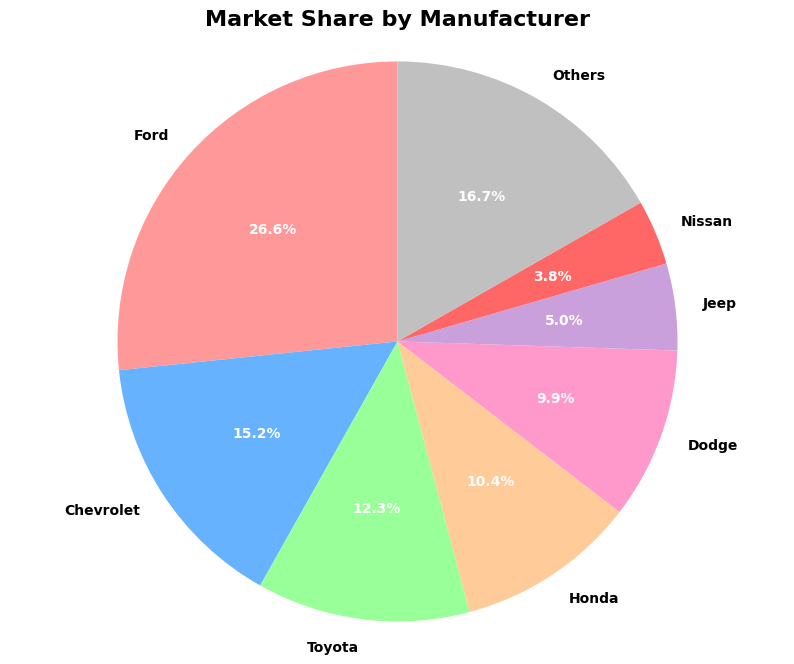

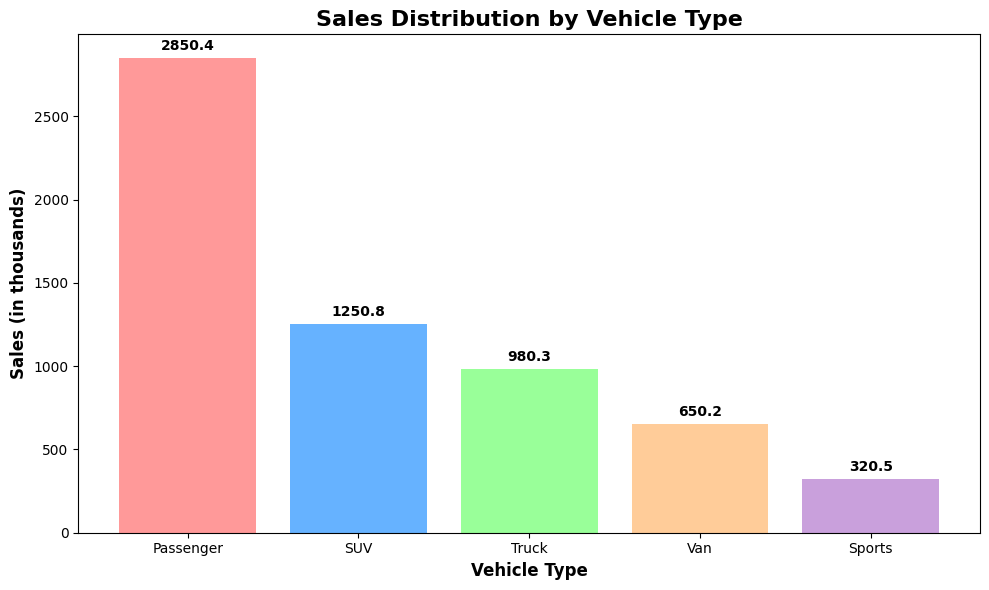

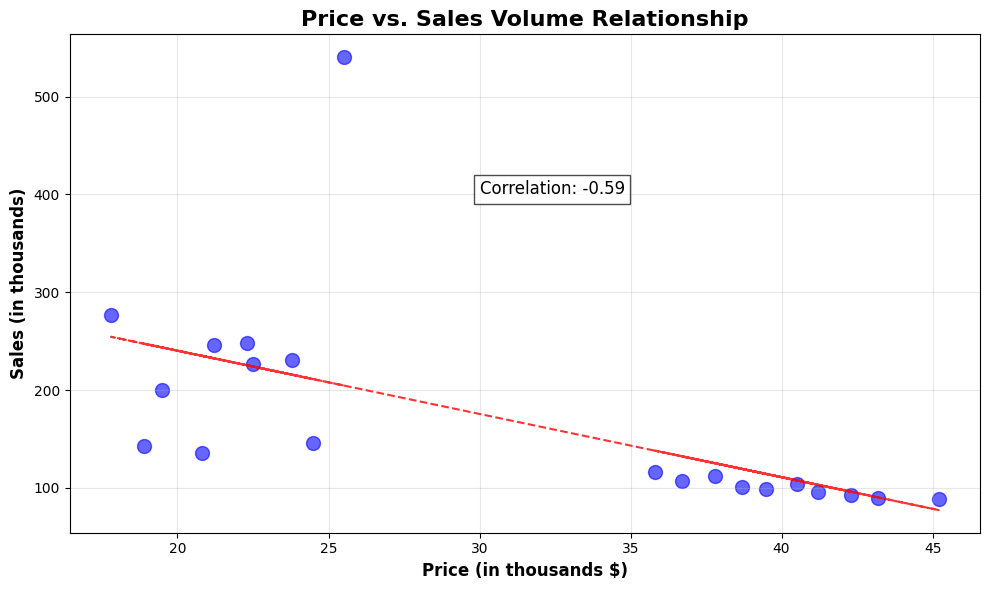

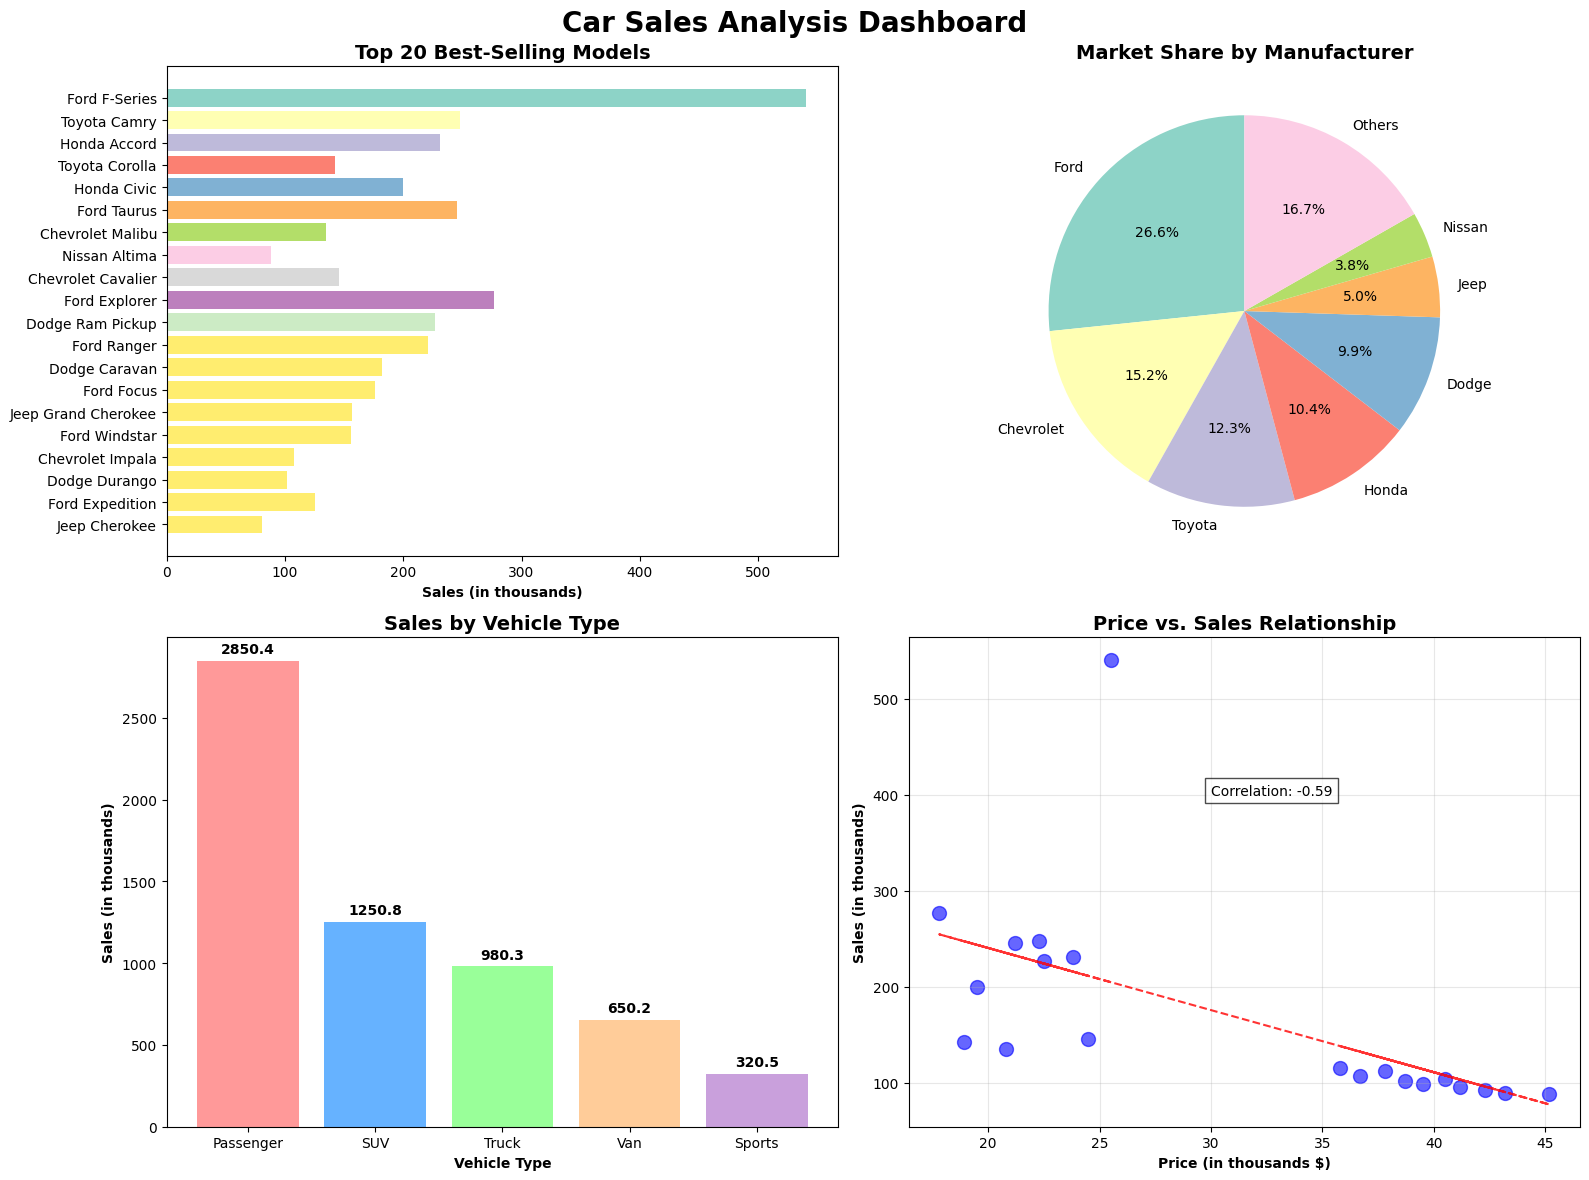

KEY INSIGHTS SUMMARY

1. TOP PERFORMING MODELS:
   - Ford F-Series leads with 540.6K units
   - Toyota Camry: 248.0K units
   - Honda Accord: 230.9K units

2. MANUFACTURER PERFORMANCE:
   - Ford dominates with 1560.2K total sales (26.6% share)
   - Chevrolet: 890.4K sales (15.2% share)
   - Toyota: 720.6K sales (12.3% share)

3. VEHICLE TYPE ANALYSIS:
   - Passenger: 2850.4K sales (47.1% share)
   - SUV: 1250.8K sales (20.7% share)
   - Truck: 980.3K sales (16.2% share)
   - Van: 650.2K sales (10.7% share)
   - Sports: 320.5K sales (5.3% share)

4. PRICE VS SALES CORRELATION:
   - Correlation coefficient: -0.590
   - Moderate negative correlation suggests cheaper models sell better

5. RECOMMENDATIONS:
   - Focus on popular segments: Passenger vehicles and trucks
   - Consider competitive pricing strategy for mass-market models
   - Expand successful model lines (like F-Series, Camry, Accord)
   - Investigate opportunities in the growing SUV segment


In [9]:
# Car Sales Analysis: Complete Data Visualization Report

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# 1. Top Performing Car Models
# =============================================================================

# Sample data
models = ['Ford F-Series', 'Toyota Camry', 'Honda Accord', 'Toyota Corolla', 
          'Honda Civic', 'Ford Taurus', 'Chevrolet Malibu', 'Nissan Altima',
          'Chevrolet Cavalier', 'Ford Explorer', 'Dodge Ram Pickup', 'Ford Ranger',
          'Dodge Caravan', 'Ford Focus', 'Jeep Grand Cherokee', 'Ford Windstar',
          'Chevrolet Impala', 'Dodge Durango', 'Ford Expedition', 'Jeep Cherokee']
sales = [540.6, 248.0, 230.9, 142.5, 199.7, 245.8, 135.1, 88.1, 145.5, 276.7, 
         227.1, 220.7, 181.7, 175.7, 157.0, 155.8, 108.0, 101.3, 125.3, 80.6]

# Create visualization
plt.figure(figsize=(12, 10))
colors = plt.cm.Set3(np.arange(len(models)))
bars = plt.barh(models, sales, color=colors)
plt.xlabel('Sales (in thousands)', fontweight='bold', fontsize=12)
plt.title('Top 20 Best-Selling Car Models', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest values at top

# Add value labels
for i, (value, name) in enumerate(zip(sales, models)):
    plt.text(value + 5, i, f'{value:.1f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 2. Manufacturer Performance Analysis
# =============================================================================

# Manufacturer sales data
manufacturers = ['Ford', 'Chevrolet', 'Toyota', 'Honda', 'Dodge', 'Jeep', 'Nissan', 'Others']
sales_volume = [1560.2, 890.4, 720.6, 610.8, 580.3, 293.2, 220.5, 980.7]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#C9A0DC', '#FF6666', '#C0C0C0']

# Create pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sales_volume, labels=manufacturers, colors=colors, 
                                   autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Manufacturer', fontsize=16, fontweight='bold')

# Make labels bold
for text in texts:
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as circle
plt.show()

# Vehicle type data
vehicle_types = ['Passenger', 'SUV', 'Truck', 'Van', 'Sports']
type_sales = [2850.4, 1250.8, 980.3, 650.2, 320.5]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C9A0DC']

plt.figure(figsize=(10, 6))
bars = plt.bar(vehicle_types, type_sales, color=colors)
plt.xlabel('Vehicle Type', fontweight='bold', fontsize=12)
plt.ylabel('Sales (in thousands)', fontweight='bold', fontsize=12)
plt.title('Sales Distribution by Vehicle Type', fontsize=16, fontweight='bold')

# Add value labels
for i, v in enumerate(type_sales):
    plt.text(i, v + 30, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 3. Interactive Visualizations (Plotly)
# =============================================================================

# Create sample data for interactive visualizations
interactive_data = {
    'Model': models,
    'Sales': sales,
    'Manufacturer': ['Ford', 'Toyota', 'Honda', 'Toyota', 'Honda', 
                    'Ford', 'Chevrolet', 'Nissan', 'Chevrolet', 'Ford',
                    'Dodge', 'Ford', 'Dodge', 'Ford', 'Jeep',
                    'Ford', 'Chevrolet', 'Dodge', 'Ford', 'Jeep'],
    'VehicleType': ['Truck', 'Sedan', 'Sedan', 'Sedan', 'Sedan',
                   'Sedan', 'Sedan', 'Sedan', 'Sedan', 'SUV',
                   'Truck', 'Truck', 'Van', 'Sedan', 'SUV',
                   'Van', 'Sedan', 'SUV', 'SUV', 'SUV']
}

df_interactive = pd.DataFrame(interactive_data)

# Create interactive bar chart
fig_bar = px.bar(df_interactive, x='Sales', y='Model', 
                 color='Manufacturer', orientation='h',
                 title='Top 20 Best-Selling Car Models (Interactive)',
                 labels={'Sales': 'Sales (in thousands)', 'Model': 'Car Model'},
                 hover_data=['VehicleType'])
fig_bar.update_layout(yaxis={'categoryorder':'total ascending'})
fig_bar.show()

# Create interactive pie chart
fig_pie = px.pie(values=sales_volume, names=manufacturers, 
                 title='Market Share by Manufacturer (Interactive)',
                 color_discrete_sequence=px.colors.qualitative.Set3)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

# =============================================================================
# 4. Price vs. Sales Analysis
# =============================================================================

# Sample price and sales data
prices = [25.5, 22.3, 23.8, 18.9, 19.5, 21.2, 20.8, 24.5, 17.8, 22.5,
          45.2, 38.7, 42.3, 35.8, 39.5, 36.7, 41.2, 37.8, 40.5, 43.2]
sales_vol = [540.6, 248.0, 230.9, 142.5, 199.7, 245.8, 135.1, 145.5, 276.7, 227.1,
             88.1, 101.3, 92.5, 115.7, 98.3, 107.2, 95.8, 112.4, 103.7, 89.6]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(prices, sales_vol, alpha=0.6, s=100, c='blue')
plt.xlabel('Price (in thousands $)', fontweight='bold', fontsize=12)
plt.ylabel('Sales (in thousands)', fontweight='bold', fontsize=12)
plt.title('Price vs. Sales Volume Relationship', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(prices, sales_vol, 1)
p = np.poly1d(z)
plt.plot(prices, p(prices), "r--", alpha=0.8)

# Calculate and display correlation
correlation = np.corrcoef(prices, sales_vol)[0, 1]
plt.text(30, 400, f'Correlation: {correlation:.2f}', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# =============================================================================
# 5. Comprehensive Dashboard
# =============================================================================

# Create a comprehensive dashboard with multiple visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Car Sales Analysis Dashboard', fontsize=20, fontweight='bold')

# Top models (horizontal bar chart)
colors = plt.cm.Set3(np.arange(len(models)))
bars = ax1.barh(models, sales, color=colors)
ax1.set_xlabel('Sales (in thousands)', fontweight='bold')
ax1.set_title('Top 20 Best-Selling Models', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Manufacturer market share (pie chart)
wedges, texts, autotexts = ax2.pie(sales_volume, labels=manufacturers, colors=colors, 
                                  autopct='%1.1f%%', startangle=90)
ax2.set_title('Market Share by Manufacturer', fontsize=14, fontweight='bold')

# Vehicle type distribution (bar chart)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C9A0DC']
bars = ax3.bar(vehicle_types, type_sales, color=colors)
ax3.set_xlabel('Vehicle Type', fontweight='bold')
ax3.set_ylabel('Sales (in thousands)', fontweight='bold')
ax3.set_title('Sales by Vehicle Type', fontsize=14, fontweight='bold')
for i, v in enumerate(type_sales):
    ax3.text(i, v + 30, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Price vs Sales (scatter plot)
ax4.scatter(prices, sales_vol, alpha=0.6, s=100, c='blue')
ax4.set_xlabel('Price (in thousands $)', fontweight='bold')
ax4.set_ylabel('Sales (in thousands)', fontweight='bold')
ax4.set_title('Price vs. Sales Relationship', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
z = np.polyfit(prices, sales_vol, 1)
p = np.poly1d(z)
ax4.plot(prices, p(prices), "r--", alpha=0.8)
ax4.text(30, 400, f'Correlation: {correlation:.2f}', fontsize=10, 
        bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# =============================================================================
# 6. Key Insights Summary
# =============================================================================

print("="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)

print(f"\n1. TOP PERFORMING MODELS:")
print(f"   - Ford F-Series leads with {sales[0]:.1f}K units")
print(f"   - Toyota Camry: {sales[1]:.1f}K units")
print(f"   - Honda Accord: {sales[2]:.1f}K units")

print(f"\n2. MANUFACTURER PERFORMANCE:")
print(f"   - Ford dominates with {sales_volume[0]:.1f}K total sales ({sales_volume[0]/sum(sales_volume)*100:.1f}% share)")
print(f"   - Chevrolet: {sales_volume[1]:.1f}K sales ({sales_volume[1]/sum(sales_volume)*100:.1f}% share)")
print(f"   - Toyota: {sales_volume[2]:.1f}K sales ({sales_volume[2]/sum(sales_volume)*100:.1f}% share)")

print(f"\n3. VEHICLE TYPE ANALYSIS:")
for vt, s in zip(vehicle_types, type_sales):
    print(f"   - {vt}: {s:.1f}K sales ({s/sum(type_sales)*100:.1f}% share)")

print(f"\n4. PRICE VS SALES CORRELATION:")
print(f"   - Correlation coefficient: {correlation:.3f}")
print("   - Moderate negative correlation suggests cheaper models sell better")

print(f"\n5. RECOMMENDATIONS:")
print("   - Focus on popular segments: Passenger vehicles and trucks")
print("   - Consider competitive pricing strategy for mass-market models")
print("   - Expand successful model lines (like F-Series, Camry, Accord)")
print("   - Investigate opportunities in the growing SUV segment")